Laboratorium 11.03.2024

In [1]:
import numpy as np
import random
import pandas as pd #ramki danych
import seaborn as sns #wykresy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataframe=pd.read_csv('diabetes.csv')

In [3]:
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataframe["Glucose"]

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
print(dataframe.isnull().sum()) 
dataframe.dropna() #usuwa rekordy z NaN (null'e)
print(dataframe.describe()) #dużo przydatnych statystyk

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedig

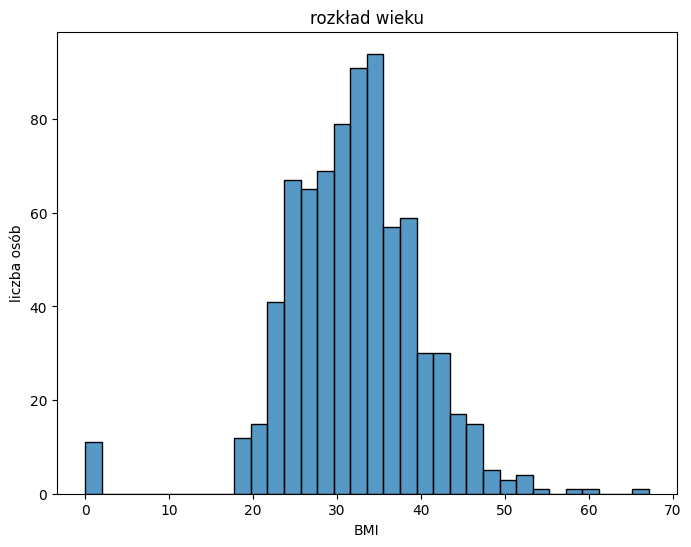

In [7]:
plt.figure(figsize=(8,6)) #w calach for some reason
sns.histplot(dataframe["BMI"])
plt.title("rozkład wieku")
plt.xlabel("BMI")
plt.ylabel("liczba osób")
plt.show()

In [8]:
#normalizacja -> zapisuje do zakresu <0,1> 
# min-max-> x'=(x-min)/(max-min)-min
#sklearn.preprocessing.MinMaxScaler()
scaler = MinMaxScaler()
scaler.fit(dataframe)
df_scaled=pd.DataFrame(scaler.transform(dataframe), columns=dataframe.columns)

In [9]:
y=dataframe.pop('Outcome')
x=dataframe
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)#po czym, y, podział

In [10]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
165,6,104,74,18,156,29.9,0.722,41
577,2,118,80,0,0,42.9,0.693,21
132,3,170,64,37,225,34.5,0.356,30
385,1,119,54,13,50,22.3,0.205,24
182,1,0,74,20,23,27.7,0.299,21
...,...,...,...,...,...,...,...,...
497,2,81,72,15,76,30.1,0.547,25
479,4,132,86,31,0,28.0,0.419,63
507,1,130,60,23,170,28.6,0.692,21
33,6,92,92,0,0,19.9,0.188,28


Laboratorium 18.03.2024 

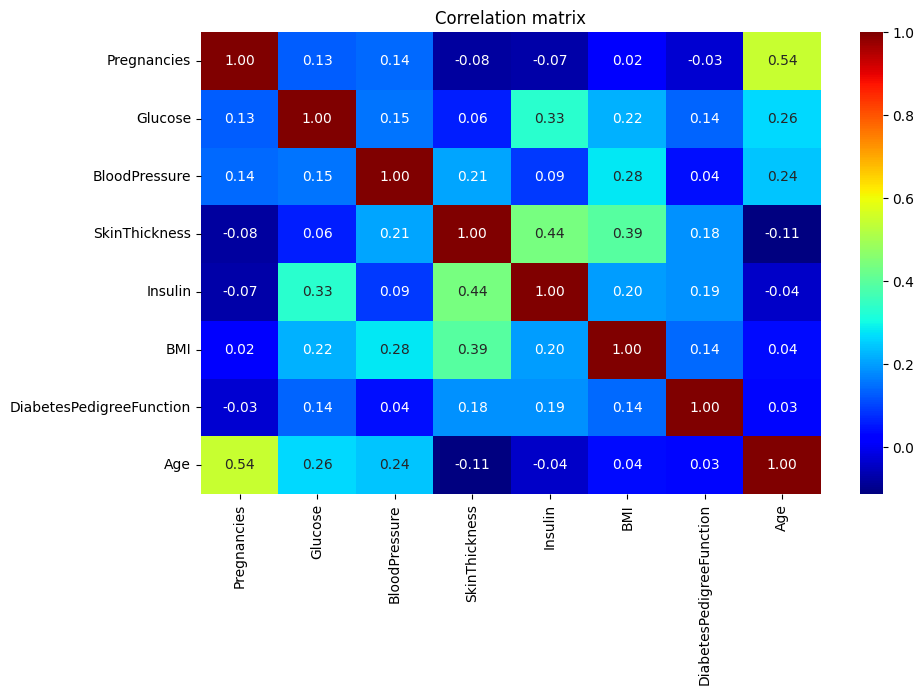

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(dataframe.corr(), annot=True,cmap='jet',fmt='.2f') #jet,copper, coolwarm
plt.title('Correlation matrix')
plt.show()
#seaborn <-> matplotlib współpraca

In [12]:
#identyfikator KNN (K Najlbiższych Sąsiadów)
from sklearn.neighbors import KNeighborsClassifier
knn_lib=KNeighborsClassifier(20)
knn_lib.fit(x_train,y_train)
knn_lib.score(x_test,y_test)

0.7142857142857143

In [13]:
#przypomnij sobie metryki!

In [20]:
def calculate_accuracy(y_test,y_predicion):
    correct = sum(y_test == y_prediction) #bardzo fajny patent
    """
    for i in range (0, len(y_test)):
        if y_test[i]==y_prediction[i]:
            corrected+=1
    """
    return correct/len(y_test)

class KNN:
    def __init__(self, k): #podłogi z tyłu to operator specjalny
        self.neighbours_number = k
        
    def fit(self,x_train,y_train):
        self.x_train=x_train
        self.y_train=y_train

    def predict(self, x_test):
        """
        My try:

        x_test=x_test.values.tolist()
        x_train=self.x_train.values.tolist()
        y_decision=self.y_train.values.tolist()
        
        prediction =[]
     
        for tested in x_test: #dla każdego który trzeba sprawdzić
            judges=[] #tworzymy listę potencjalnych sąsiadów
            index_counter =0
            distance =0 #i obliczamy odległość
            for judge in x_train:
                for category in range(0,len(judge)): #dla każdej kategori 
                    distance+=np.power(tested[category]-judge[category],2)
                distance = np.sqrt(distance)
                judges.append([distance,y_decision[index_counter]]) #tworzy macierz z odległościami i wynikami
                index_counter+=1 
   
            #głosowanie
            votes=[]
            judges=sorted(judges,reverse =True)
            best_vote=judges.pop()
            votes.append(best_vote[1])
            for _ in self.neighbours_number-1:
                vote=judges.pop()
                votes.append(vote[1])
            agreed=sum(votes == 1)

            #niedokończone 
         """
        prediction =[]
        for tested in x_test.values:   
            distances = [np.linalg.norm(tested - x1) for x1 in self.x_train.values]
            indices=np.argsort(distances)[:self.neighbours_number] #[przycięcie do ilości sąsiadów]; zwraca indeksy 
            labels = [self.y_train.iloc[i] for i in indices] #iloc???
            result = max(set(labels),key=labels.count) # przypomnij sobie set'y itd
            prediction.append(result)
        return prediction


#test example
print(y_train.iloc[1])
my_knn= KNN(2)
my_knn.fit(x_train,y_train)
y_prediction=my_knn.predict(x_test)
calculate_accuracy (y_test,y_prediction)

1


0.683982683982684

KlASYFIKATOR BAYESA

In [15]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train,y_train)
y_pred=nb_classifier.predict(x_test)
print(f"Dokładność klasyfikatora wynosi {str(calculate_accuracy(y_test,y_pred))}")


Dokładność klasyfikatora wynosi 0.7142857142857143


In [16]:
class naive_bayes:
    def __init__(self):
        self.mean={}
        self.variancy={}
        self.class_priority={}
        
    def fit(self, x_training,y_training):
        self.classes = np.unique(y_training) #pobiera etykiety
        for c in self.classes:
            x_c = x_train[y==c]
            self.class_priority[c]=len(x_c)/len(x_training)
            self.mean[c]=np.mean(x_c,axis=0)
            self.variancy[c]=np.var(x_c,axis=0)
            
    def _gauss(self,x,mean,var): #var is variancy, not standard deviation!!!!
        exponent = np.exp(-(x-mean)**2/(2*var))
        return 1/np.sqrt(2*np.pi*var)*exponent
                          
    def _calculate_posterior(self,x): #prawdopodobieństwo wynikowe/złożone
        #1 using gauss calculate probability for each test element
        #2 calculate prosterior
        posteriors={}
        for c in self.classes:
            prob=np.sum(self._gauss(x,self.mean[c],self.variancy[c]))#najczęściej jest to normalizowane logarytmem, tak samo posterior
            posteriors[c]=self.class_priority[c]+prob
        return(posteriors)
"""
        
            case=x_test[y==c]
            prosterior=1
            for x in case:
                probability=self._gauss(x,self.mean[x],self.variancy[x])
                prosterior*=probability
            prosteriors[case]=prosterior
        self.prosteriors=prosteriors
"""
    def predict(self,x_prediction):
        predictions=[]
        for x in x_prediction.values:
            prob = self._calculate_posterior(x)
            predictions.append(max(prob,key=prob.get)) #max nie zwróci klucza sam z siebie
        return predictions
        #podejmij decyzje

my_nb_classifier=naive_bayes()
my_nb_classifier.fit(x_train,y_train)
y_pred=my_nb_classifier.predict(x_test)
print(f"Dokładność klasyfikatora wynosi {str(calculate_accuracy(y_test,y_pred))}")

/tmp/ipykernel_12055/2578379962.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_c = x_train[y==c]
/tmp/ipykernel_12055/2578379962.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_c = x_train[y==c]


Dokładność klasyfikatora wynosi 0.7142857142857143


Współczynnik gini'ego
wyliczamy dla każdej kolumny, bierzemy kolumnę z największym.
liczymy średnią dla kolumny i używamy jej dla if'a
warunki stopu:
- współczynnik  < giniego <
-

Na kolokwium nie będzie :>

Dokładność klasyfikatora wynosi 0.7142857142857143


AttributeError: module 'sklearn.tree' has no attribute 'show'

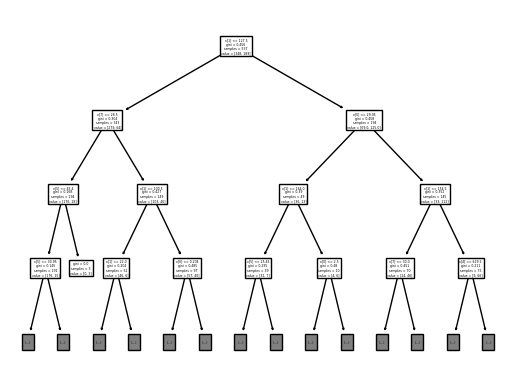

In [17]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(x_train,y_train)
y_pred=decision_tree.predict(x_test)
print(f"Dokładność klasyfikatora wynosi {str(calculate_accuracy(y_test,y_pred))}")
tree.plot_tree(decision_tree, max_depth= 3)
tree.show()

In [ ]:
#z biblioteką iris????/
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
tree.plot_tree(clf)
plt.show()